# ====================CLUSTING==========================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [2]:
airline=pd.read_csv("EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airline.shape

(3999, 12)

In [4]:
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airline.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [6]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
airline.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
airline2=airline.drop(['ID#','Award?'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [9]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [10]:
airline2_norm =norm_func(airline2)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


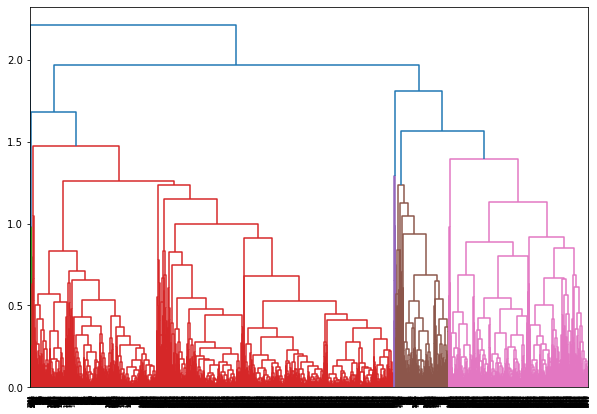

In [11]:
plt.figure(figsize=(10,7))
denodograms=sch.dendrogram(sch.linkage(airline2_norm,'complete'))

In [12]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hclusters

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [13]:
y=pd.DataFrame(hclusters.fit_predict(airline2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

2    2596
0    1376
1      14
4       9
3       4
Name: clustersid, dtype: int64

In [14]:
airline2['clustersid']=hclusters.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [15]:
airline2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,106776.901163,149.668605,3.667151,1.001453,1.001453,38389.199128,18.653343,477.122093,1.428052,4182.311047
1,1,141021.000000,0.000000,3.642857,1.000000,4.142857,97132.785714,28.214286,378.571429,1.071429,4462.142857
2,2,52499.307781,137.437211,1.201079,1.021572,1.001156,5388.251541,7.672188,414.703005,1.245763,4074.776579
3,3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000
4,4,957355.333333,1355.000000,1.222222,1.000000,1.000000,14267.222222,15.555556,2392.666667,9.111111,7318.666667


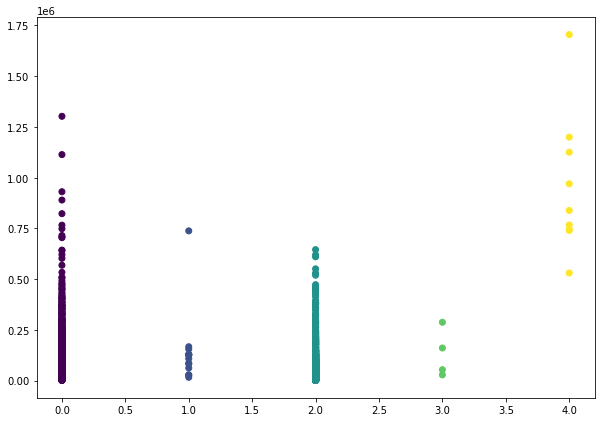

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(airline2['clustersid'],airline2['Balance'],c=hclusters.labels_)

In [17]:
from sklearn.cluster import KMeans 

In [18]:
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


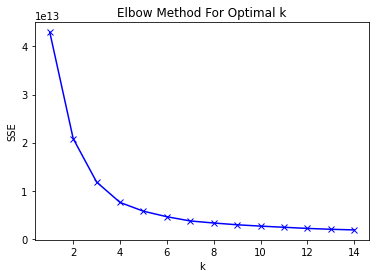

In [19]:
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(airline2)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
model=KMeans(n_clusters=5)
model.fit(airline2_norm)
model.labels_

array([0, 0, 0, ..., 1, 2, 2])

In [21]:
md=pd.Series(model.labels_)
airline2['clusters']=md
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clustersid,clusters
0,28143,0,1,1,1,174,1,0,0,7000,2,0
1,19244,0,1,1,1,215,2,0,0,6968,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,2,0
3,14776,0,1,1,1,500,1,0,0,6952,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2,2
3995,64385,0,1,1,1,981,5,0,0,1395,2,2
3996,73597,0,3,1,1,25447,8,0,0,1402,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,2,2


In [22]:
airline2.groupby(airline2.clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clustersid
clusters,,,,,,,,,,,
0,63783.709369,173.298279,1.000000,1.024857,1.002868,4211.181644,6.915870,509.397706,1.569790,5688.730402,2.015296
1,84191.411661,125.501767,3.553004,1.001767,1.008834,31955.469965,18.256184,415.667845,1.213781,2734.077739,0.007067
2,39957.412326,118.133529,1.088041,1.021277,1.005136,4426.820983,7.148936,399.077036,1.168745,2146.021277,1.823918
3,150081.274583,206.335807,4.461967,1.000000,1.050093,59219.081633,20.935065,683.432282,2.024119,5957.920223,0.022263
4,91970.824742,106.760825,2.661856,1.004124,1.014433,16737.538144,16.084536,328.562887,0.989691,5847.160825,1.327835


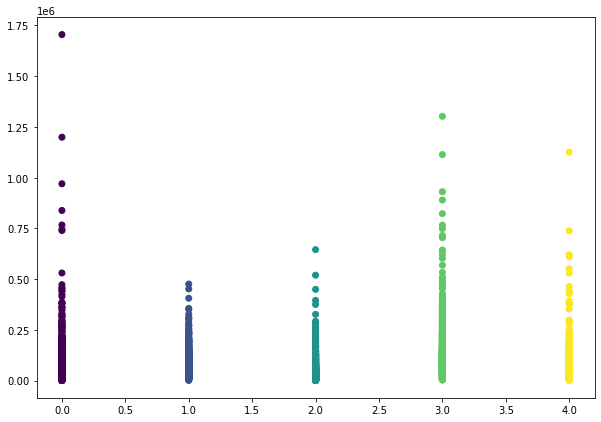

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(airline2['clusters'],airline2['Balance'],c=model.labels_)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import DBSCAN

In [25]:
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [26]:
dbscan=DBSCAN(eps=0.8,min_samples=15)
dbscan.fit(airline2_norm)

DBSCAN(eps=0.8, min_samples=15)

In [27]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
ml=pd.DataFrame(dbscan.labels_,columns=['cluster'])
pd.concat([airline2_norm,ml],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0


### ============================== CRIME DATA=======================

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [30]:
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [31]:
crime.shape

(50, 5)

In [32]:
crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [33]:
crime.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [34]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [35]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [36]:
crime.drop(["Unnamed: 0"],inplace=True,axis=1)

In [37]:
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [38]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [39]:
df_norm=norm_func(crime.iloc[:,:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


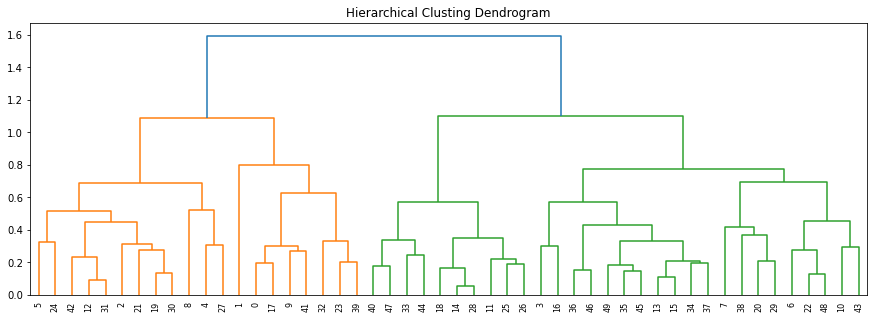

In [40]:
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clusting Dendrogram')
denodrogram=sch.dendrogram(sch.linkage(df_norm,method="complete"))

In [41]:
agglo=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single').fit(df_norm)
agglo                                                                                                                                         

AgglomerativeClustering(linkage='single', n_clusters=3)

In [42]:
y_agglo=agglo.fit_predict(df_norm)
clusters=pd.DataFrame(y_agglo,columns=['clusters'])

In [43]:
clusters

,clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,0


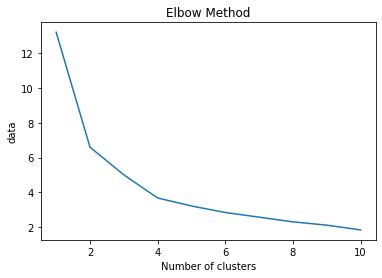

In [44]:
data=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    data.append(kmeans.inertia_)
plt.plot(range(1,11),data)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('data')
plt.show()


In [45]:
X=np.random.uniform(0,1,1000)
X

array([8.62627745e-01, 7.86574405e-01, 8.03073847e-01, 2.12473322e-01,
       3.98197407e-01, 3.34751042e-01, 3.18977084e-01, 6.17632978e-01,
       9.74038657e-01, 5.38388901e-01, 9.19850820e-01, 3.34182265e-01,
       3.74673854e-01, 3.90043454e-01, 7.49200932e-01, 9.23129154e-01,
       1.38890392e-01, 7.21629294e-01, 1.40963818e-01, 8.36588284e-02,
       8.72231452e-01, 5.81830069e-02, 2.85004534e-01, 8.82990802e-01,
       9.73637045e-01, 3.39668865e-01, 8.91924635e-01, 7.39697673e-01,
       1.69430513e-01, 6.70667884e-01, 9.77941289e-01, 2.16299635e-01,
       2.04703649e-01, 7.85197545e-01, 8.09067300e-01, 6.23028159e-02,
       1.34812969e-01, 6.53734625e-01, 2.91755417e-01, 1.85282833e-01,
       8.42425714e-01, 1.29141414e-01, 3.71181713e-01, 6.88730388e-01,
       7.46088646e-01, 9.86785911e-01, 2.77165348e-01, 1.37580124e-01,
       3.69732362e-01, 6.16628524e-01, 5.14393223e-01, 9.09364787e-01,
       5.92559220e-01, 6.58849606e-01, 4.38507764e-01, 8.89734591e-01,
      

In [46]:
model=KMeans(n_clusters=4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [47]:
model.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       3, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 3, 1])

In [48]:
md=pd.Series(model.labels_)
crime['clust']=md
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [49]:
crime.iloc[:,:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.852941,141.176471,73.647059,19.335294
2,10.966667,264.000000,76.500000,33.608333
3,3.600000,78.538462,52.076923,12.176923


In [50]:
crime.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [51]:
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
 4   clust     50 non-null     int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 1.9 KB
None


In [52]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ],
       [ 10. , 263. ,  48. ,  44.5,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   2. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ],
       [  9. , 276. ,  91. ,  40.6,   2. ],
       [  7.9, 204. ,  78. ,  38.7,   2. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ],
       [ 15.4, 335. ,  80. ,  31.9,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   1. ],
       [  2.6, 120. ,  54. ,  14.2,   3. ],
       [ 10.4, 249. ,  83. ,  24. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ],
       [  2.2,  56. ,  57. ,  11.3,   3. ],
       [  6. , 115. ,  66. ,  18. ,   1. ],
       [  9.7, 109. ,  52. ,  16.3,   3. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ],
       [  2.1,  83. ,  51. ,   7.8,   3. ],
       [ 11.3, 300. ,  67. ,  27.8,   2. ],
       [  4.4, 149. ,  85. ,  16.3,   1. ],
       [ 12.1, 255. ,  74. ,  35.1,   2. ],
       [  2.7,  72. ,  66. ,  14

In [53]:
st_scaler=StandardScaler().fit(array)
X=st_scaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.53960072],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.38490018],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.38490018],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.53960072],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.38490018],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.38490018],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.57735027],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.57735027],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.38490018],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.53960072],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.57735027],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  1.34715063],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  0.38490018],
       [-0.13637203, -0.70012057, -0.0

In [54]:
dbscan=DBSCAN(eps=0.8,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.8)

In [55]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

In [56]:
clt=pd.DataFrame(dbscan.labels_,columns=['cluster'])
clt

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [57]:
pd.concat([crime,clt],axis=1)

,Murder,Assault,UrbanPop,Rape,clust,cluster
0,13.2,236,58,21.2,0,-1
1,10.0,263,48,44.5,2,-1
2,8.1,294,80,31.0,2,-1
3,8.8,190,50,19.5,0,-1
4,9.0,276,91,40.6,2,-1
5,7.9,204,78,38.7,2,-1
6,3.3,110,77,11.1,1,-1
7,5.9,238,72,15.8,1,-1
8,15.4,335,80,31.9,2,-1
9,17.4,211,60,25.8,0,-1
